In [1]:
import numpy as np
import pickle
from sklearn.cluster import k_means
from itertools import combinations
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('tags_vectors.pickle', 'rb') as f:
    data = pickle.load(f)

In [3]:
X = np.array([data[i] for i in data])

In [4]:
res = k_means(X, 50)

In [5]:
cosine_dist = np.array([[X[i]@X[j] for i in range(X.shape[0])] for j in range(X.shape[0])])
sum_dist = (np.sum(cosine_dist) - X.shape[0])/2
num_pairs = X.shape[0]*(X.shape[0]-1)/2

In [6]:
res_classes = []
for n_clusters in range(50, 351, 10):
    res_classes.append(k_means(X, n_clusters)[1])

In [7]:
cos_dist_sim = []
cos_dist_diff = []
for classes in res_classes:
    words_in_classes = [[] for i in range(len(classes))]
    for i, j in enumerate(classes):
        words_in_classes[j].append(i)
    dist_sim = [cosine_dist[i][j] for k in words_in_classes for i, j in combinations(k, 2)]
    dist_diff = (sum_dist - np.sum(dist_sim))/(num_pairs - len(dist_sim))
    cos_dist_sim.append(np.mean(dist_sim))
    cos_dist_diff.append(dist_diff)

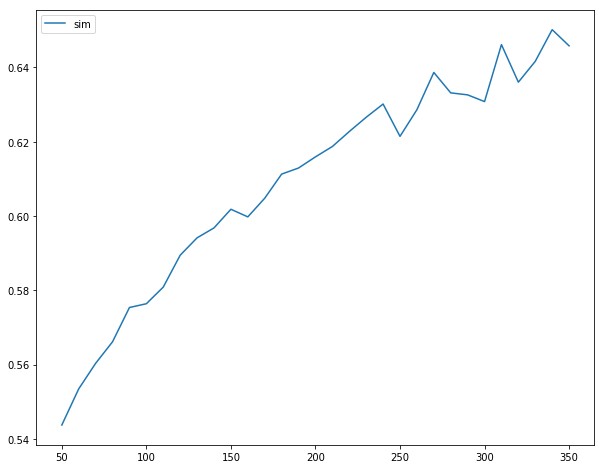

In [8]:
plt.figure(figsize=(10, 8))
plt.plot(range(50, 351, 10),cos_dist_sim, label='sim')
plt.legend()
plt.show()

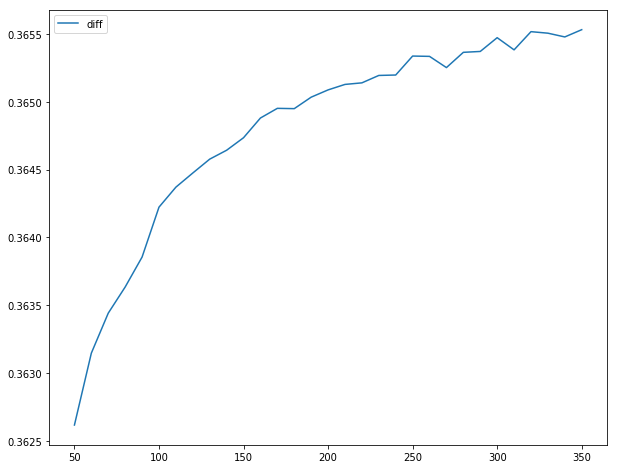

In [9]:
plt.figure(figsize=(10, 8))
plt.plot(range(50, 351, 10),cos_dist_diff, label='diff')
plt.legend()
plt.show()